In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./dataset/michael_scott/14_272845558_3095757487379714_6889279701267759540_n.jpg')
img.shape

(460, 702, 3)

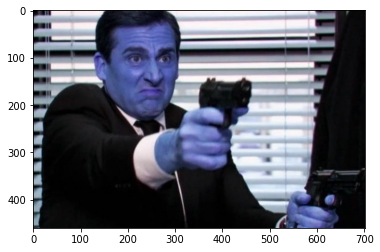

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(460, 702)

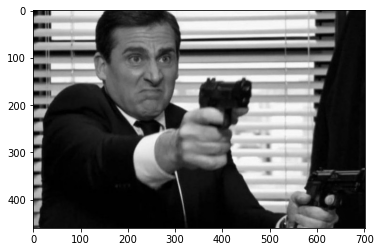

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
gray

array([[24, 23, 23, ...,  7,  7,  7],
       [ 7,  7,  7, ...,  7,  7,  6],
       [ 4,  3,  3, ...,  6,  6,  6],
       ...,
       [43, 45, 46, ...,  3,  3,  3],
       [42, 44, 46, ...,  3,  3,  3],
       [50, 53, 54, ...,  3,  3,  3]], dtype=uint8)

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[160,  33, 176, 176]])

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(160, 33, 176, 176)

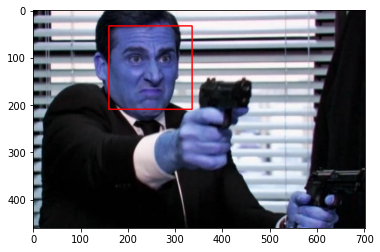

In [9]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

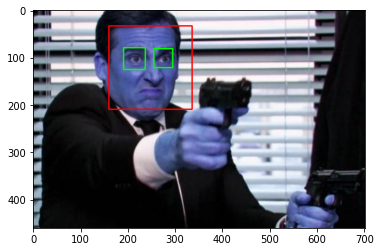

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    # region of interest -> roi
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()          

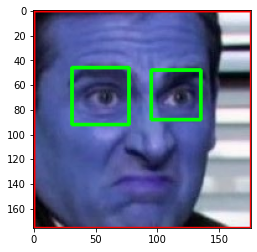

In [11]:
plt.imshow(roi_color, cmap="gray")

In [12]:
# creating a function to crop face

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

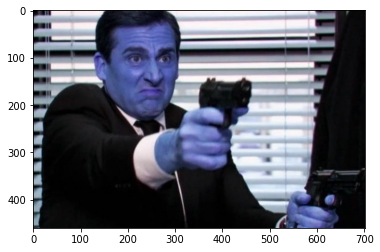

In [13]:
original_image = cv2.imread('./dataset/michael_scott/14_272845558_3095757487379714_6889279701267759540_n.jpg')
plt.imshow(original_image)

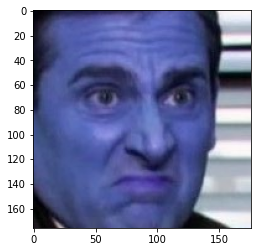

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/michael_scott/14_272845558_3095757487379714_6889279701267759540_n.jpg')
plt.imshow(cropped_image)

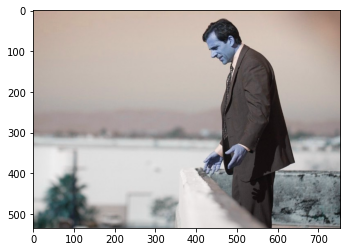

In [15]:
original_image_obstructed = cv2.imread('./dataset/michael_scott/13_272955714_263943519216313_7574222346091845539_n.jpg')
plt.imshow(original_image_obstructed)

In [16]:
cropped_image_obstructed = get_cropped_image_if_2_eyes('./dataset/michael_scott/13_272955714_263943519216313_7574222346091845539_n.jpg')
# plt.imshow(cropped_image_obstructed)
cropped_image_obstructed

# this image does not have 2 eyes hence no output

### creating new cropped directory

In [17]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [18]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.path != './dataset/cropped':
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/angela_martin',
 './dataset/dwight_schrute',
 './dataset/jim_halpert',
 './dataset/kelly_kapoor',
 './dataset/kevin_malone',
 './dataset/michael_scott',
 './dataset/pam_beesly']

In [20]:
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)

os.mkdir(path_to_cropped_data)

### iterating through image directories

In [21]:
cropped_image_dirs = []
char_file_names_dict = {}

for dir in img_dirs:
    count = 1
    char_name = dir.split('/')[-1]    
    print(char_name)
    
    char_file_names_dict[char_name] = []
    
    for entry in os.scandir(dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + char_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder...", cropped_folder)
                
            cropped_file_name = char_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            # save roi_color as an image in cropped_file_path
            cv2.imwrite(cropped_file_path, roi_color)
            
            char_file_names_dict[char_name].append(cropped_file_path)
            count += 1

angela_martin
generating cropped images in folder... ./dataset/cropped/angela_martin
dwight_schrute
generating cropped images in folder... ./dataset/cropped/dwight_schrute
jim_halpert
generating cropped images in folder... ./dataset/cropped/jim_halpert
kelly_kapoor
generating cropped images in folder... ./dataset/cropped/kelly_kapoor
kevin_malone
generating cropped images in folder... ./dataset/cropped/kevin_malone
michael_scott
generating cropped images in folder... ./dataset/cropped/michael_scott
pam_beesly
generating cropped images in folder... ./dataset/cropped/pam_beesly


In [22]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray =  img
    
    # datatype conversion
    # 1. convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # 2. convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

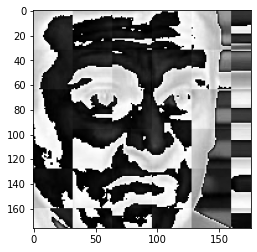

In [24]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [25]:
char_file_names_dict

{'angela_martin': ['./dataset/cropped/angela_martin/angela_martin1.jpg',
  './dataset/cropped/angela_martin/angela_martin2.jpg',
  './dataset/cropped/angela_martin/angela_martin3.jpg',
  './dataset/cropped/angela_martin/angela_martin4.jpg',
  './dataset/cropped/angela_martin/angela_martin5.jpg',
  './dataset/cropped/angela_martin/angela_martin6.jpg',
  './dataset/cropped/angela_martin/angela_martin7.jpg',
  './dataset/cropped/angela_martin/angela_martin8.jpg',
  './dataset/cropped/angela_martin/angela_martin9.jpg',
  './dataset/cropped/angela_martin/angela_martin10.jpg',
  './dataset/cropped/angela_martin/angela_martin11.jpg',
  './dataset/cropped/angela_martin/angela_martin12.jpg',
  './dataset/cropped/angela_martin/angela_martin13.jpg',
  './dataset/cropped/angela_martin/angela_martin14.jpg',
  './dataset/cropped/angela_martin/angela_martin15.jpg',
  './dataset/cropped/angela_martin/angela_martin16.jpg',
  './dataset/cropped/angela_martin/angela_martin17.jpg',
  './dataset/cropped/an

In [26]:
class_dict = {}
count = 0

for char_name in char_file_names_dict.keys():
    class_dict[char_name] = count
    count += 1

class_dict

{'angela_martin': 0,
 'dwight_schrute': 1,
 'jim_halpert': 2,
 'kelly_kapoor': 3,
 'kevin_malone': 4,
 'michael_scott': 5,
 'pam_beesly': 6}

In [41]:
X, y = [], []

for char_name, training_files in char_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        # as we manually deleted some images from cropped folder, those images will now return None
        if img is None:
            continue
        scaled_raw_image = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        
        # vertically stack the wavelet-transformed image and original image
        combined_img = np.vstack((scaled_raw_image.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[char_name])

In [42]:
# number of images in entire cropped directory
print(len(X))
print(len(y))

print("Size of each image: ", len(X[0]))

259
259
Size of each image:  4096


In [43]:
X[0]

array([[ 97],
       [188],
       [208],
       ...,
       [211],
       [  8],
       [192]], dtype=uint8)

In [44]:
# converting X to float values (as we might get errors during training), and reshaping X
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(259, 4096)

## training model

### 1. svm 

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8153846153846154

In [47]:
len(X_test)

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.67      0.80         3
           2       1.00      0.20      0.33         5
           3       0.80      0.80      0.80         5
           4       1.00      0.40      0.57         5
           5       0.76      1.00      0.86        31
           6       0.88      0.78      0.82         9

    accuracy                           0.82        65
   macro avg       0.92      0.67      0.73        65
weighted avg       0.85      0.82      0.79        65



### 2. GridSearchCV 

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [55]:
scores = []
best_estimators = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    # gridsearchCV internally splits the X_train into training and validation sets
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.789204,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.613495,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.665722,{'logisticregression__C': 1}


In [57]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [59]:
scores

[{'model': 'svm',
  'best_score': 0.7892037786774629,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.6134952766531715,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.6657219973009447,
  'best_params': {'logisticregression__C': 1}}]

In [61]:
best_estimators['svm'].score(X_test, y_test)

# the score in the dataframe above shows it for the validation set

# the one below is for the test set!

0.8923076923076924

In [62]:
best_estimators['random_forest'].score(X_test, y_test)

0.6615384615384615

In [64]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8307692307692308

In [67]:
# therefore, SVM is the best classifier!
best_clf = best_estimators['svm']

In [68]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  1,  0],
       [ 1,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  1,  0],
       [ 0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  1,  0,  0,  1,  7]], dtype=int64)

Text(69.0, 0.5, 'True Values')

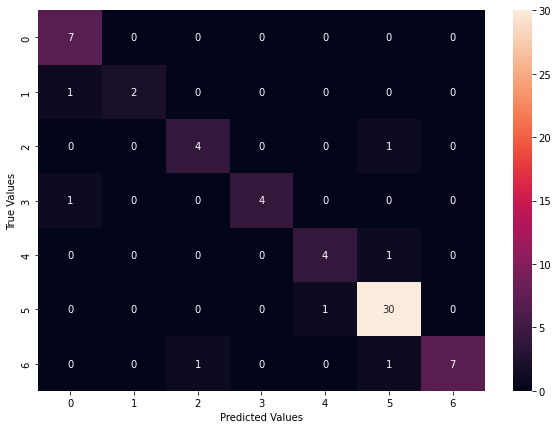

In [69]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [70]:
class_dict

{'angela_martin': 0,
 'dwight_schrute': 1,
 'jim_halpert': 2,
 'kelly_kapoor': 3,
 'kevin_malone': 4,
 'michael_scott': 5,
 'pam_beesly': 6}

## saving the trained model!

In [71]:
# !pip install joblib
import joblib

# save model as pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## saving class dictionary (the numbers assigned to the characters are useful)

In [73]:
import json

with open("class_dict.json", "w") as f:
    f.write(json.dumps(class_dict))